In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.io
import time

In [32]:
df = pd.read_csv("data/LFM-1b_users_additional.txt",sep='\t')

In [44]:
df

,user-id,novelty_artist_avg_month,novelty_artist_avg_6months,novelty_artist_avg_year,mainstreaminess_avg_month,mainstreaminess_avg_6months,mainstreaminess_avg_year,mainstreaminess_global,cnt_listeningevents,cnt_distinct_tracks,...,relative_le_per_hour14,relative_le_per_hour15,relative_le_per_hour16,relative_le_per_hour17,relative_le_per_hour18,relative_le_per_hour19,relative_le_per_hour20,relative_le_per_hour21,relative_le_per_hour22,relative_le_per_hour23
0,384,0.27662877856116547,0.044439,0.3094285950064659,0.024655,0.36734262481331825,0.000000,0.124903,17198,3601,...,0.0279,0.041,0.0811,0.1506,0.0377,0.0298,0.0132,0.0007,0.0001,0.0151
1,1206,0.43722350196912885,0.109671,0.5137868970632553,0.181991,0.3913043439388275,0.000000,0.343855,17967,10990,...,0.0016,0.0115,0.0276,0.0662,0.079,0.0838,0.0995,0.1195,0.0968,0.0839
2,2622,0.6048279783555439,0.043923,0.6989826304571969,0.052310,0.7800639122724533,0.079669,0.245980,3939,3084,...,0.132,0.0493,0.0317,0.047,0.0658,0.1127,0.1112,0.068,0.0437,0.0254
3,2732,0.756972787635667,0.020071,0.8828014254570007,0.005092,0.8863636453946432,0.032614,0.077512,234,202,...,0.0598,0.0726,0.0171,0.0342,0.0769,0.1453,0.047,0.0513,0.0085,0.0128
4,3653,0.3800046739749389,0.045207,0.4244110181051142,0.042821,0.4917559259467655,0.077731,0.207567,18238,9839,...,0.0541,0.0518,0.0564,0.0554,0.0849,0.0954,0.0833,0.0657,0.0471,0.0595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120317,50871714,0.4170865923166275,0.035417,0.5498878061771393,0.084304,0.6624909937381744,0.075544,0.160736,26932,6837,...,0.0542,0.0529,0.0575,0.0558,0.0578,0.0573,0.0515,0.0551,0.0639,0.0641
120318,50900118,0.5663278949531642,0.032624,0.6803168281912804,0.049010,0.8278538286685944,0.103613,0.145418,7174,3970,...,0.0397,0.0431,0.0587,0.0733,0.0843,0.0764,0.0728,0.0643,0.0555,0.0452
120319,50931921,0.4831712218001485,0.032946,0.35164836049079895,0.038075,0.38235294818878174,0.012505,0.136102,998,676,...,0.0561,0.1172,0.1723,0.1062,0.0892,0.1092,0.0621,0.012,0.021,0.006
120320,50933471,0.5596322199950615,0.026570,0.5991988703608513,0.040033,0.6567867696285248,0.039335,0.175908,4152,2845,...,0.0417,0.0347,0.0294,0.0236,0.0508,0.0763,0.1086,0.1419,0.1387,0.1004


In [127]:
users_df = df[["user-id","mainstreaminess_global"]]
users_df.rename(columns={"user-id": "user_id", "mainstreaminess_global": "M_global_R_APC"}, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(array([1.2444e+04, 2.9155e+04, 3.2654e+04, 2.4813e+04, 1.3835e+04,
        5.4390e+03, 1.5830e+03, 3.3000e+02, 6.4000e+01, 5.0000e+00]),
 array([2.99081533e-05, 5.44822755e-02, 1.08934643e-01, 1.63387010e-01,
        2.17839378e-01, 2.72291745e-01, 3.26744112e-01, 3.81196480e-01,
        4.35648847e-01, 4.90101214e-01, 5.44553582e-01]),
 <BarContainer object of 10 artists>)

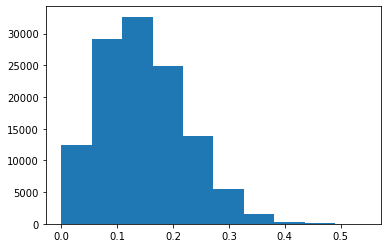

In [128]:
plt.hist(users_df["M_global_R_APC"])

In [129]:
users_df["M_global_R_APC"].describe()

count    120322.000000
mean          0.146643
std           0.075249
min           0.000030
25%           0.089515
50%           0.139031
75%           0.195726
max           0.544554
Name: M_global_R_APC, dtype: float64

In [130]:
# Select bottom 1k, top 1k, and 1 round median
high_main_users = users_df.nlargest(1000, "M_global_R_APC")
low_main_users = users_df.nsmallest(1000, "M_global_R_APC")

users_df_sorted = users_df.sort_values(by=["M_global_R_APC"], inplace=False)
median = int(len(users_df_sorted)/2)
medium_main_users = users_df_sorted.iloc[(median-500):(median+500),]

In [149]:
# alternatively select 1000 samples from the 0.2 and 0.8 percentiles
quantile20 = users_df['M_global_R_APC'].quantile(0.2)
quantile80 = users_df['M_global_R_APC'].quantile(0.8)

low_main_users_q20 = users_df[users_df["M_global_R_APC"]<quantile20].sample(1000,random_state=1)
high_main_users_q80 = users_df[users_df["M_global_R_APC"]>quantile80].sample(1000,random_state=1)
medium_main_users_q2080 = users_df[users_df["M_global_R_APC"].between(quantile20, quantile80)].sample(1000,random_state=1)

In [169]:
# alternatively select randomly from the 0.2 and 0.8 percentiles, representing more closely to actual distribution
low_main_users_q20_fair = users_df[users_df["M_global_R_APC"]<quantile20].sample(600,random_state=1)
high_main_users_q80_fair = users_df[users_df["M_global_R_APC"]>quantile80].sample(600,random_state=1)
medium_main_users_q2080_fair = users_df[users_df["M_global_R_APC"].between(quantile20, quantile80)].sample(1800,random_state=1)

# Export User Data

In [170]:
all_main_users = low_main_users.append([medium_main_users,high_main_users], ignore_index=True)
all_main_users_qq = low_main_users_q20.append([medium_main_users_q2080,high_main_users_q80], ignore_index=True)
all_main_users_qq_fair = low_main_users_q20_fair.append([medium_main_users_q2080_fair,high_main_users_q80_fair], ignore_index=True)

In [171]:
all_main_user_index = all_main_users.set_index("user_id")
all_main_user_index_qq = all_main_users_qq.set_index("user_id")
all_main_user_index_qq_fair = all_main_users_qq_fair.set_index("user_id")

In [ ]:
user_events_chunked = pd.read_csv("data/LFM-1b_LEs.txt",sep='\t', chunksize=1000000, header=None, index_col=0)

start_time= time.time()

user_events = pd.DataFrame()
for chunk in user_events_chunked:
    user_events = user_events.append(chunk.merge(all_main_user_index, left_index=True, right_index=True))

print("--- %s seconds ---" % (time.time() - start_time))

In [163]:
user_events_chunked = pd.read_csv("data/LFM-1b_LEs.txt",sep='\t', chunksize=1000000, header=None, index_col=0)

start_time= time.time()

user_events_qq = pd.DataFrame()
for chunk in user_events_chunked:
    user_events_qq = user_events_qq.append(chunk.merge(all_main_user_index_qq, left_index=True, right_index=True))

print("--- %s seconds ---" % (time.time() - start_time))

--- 942.8935930728912 seconds ---


In [172]:
user_events_chunked = pd.read_csv("data/LFM-1b_LEs.txt",sep='\t', chunksize=1000000, header=None, index_col=0)

start_time= time.time()

user_events_qq_fair = pd.DataFrame()
for chunk in user_events_chunked:
    user_events_qq_fair = user_events_qq_fair.append(chunk.merge(all_main_user_index_qq_fair, left_index=True, right_index=True))

print("--- %s seconds ---" % (time.time() - start_time))

--- 934.5448429584503 seconds ---


In [100]:
user_events.describe()

,1,2,3,4,mainstreaminess_global
count,3.979133e+07,3.979133e+07,3.979133e+07,3.979133e+07,3.979133e+07
mean,7.607818e+04,1.804936e+06,4.412417e+06,1.317632e+09,3.295764e-01
std,2.988323e+05,3.470213e+06,7.369954e+06,6.188286e+07,1.146728e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.108353e+09,2.990815e-05
25%,2.354000e+03,3.416600e+04,1.593730e+05,1.278425e+09,3.527184e-01
50%,7.058000e+03,1.664870e+05,7.043400e+05,1.332896e+09,3.681082e-01
75%,2.782500e+04,1.409289e+06,4.593897e+06,1.366327e+09,3.953795e-01
max,3.190358e+06,1.599104e+07,3.229112e+07,1.470889e+09,5.445536e-01


In [159]:
user_events_qq.describe()

,1,2,3,4,M_global_R_APC
count,5.856000e+03,5.856000e+03,5.856000e+03,5.856000e+03,5856.000000
mean,9.197002e+04,2.340930e+06,7.167101e+06,1.375344e+09,0.151128
std,3.382825e+05,4.420211e+06,1.074637e+07,2.016474e+07,0.046500
min,1.600000e+01,4.600000e+01,1.010000e+02,1.323396e+09,0.015501
25%,2.788000e+03,3.355600e+04,1.804150e+05,1.355888e+09,0.092486
50%,7.908000e+03,1.234195e+05,7.287260e+05,1.383276e+09,0.184476
75%,2.374100e+04,1.819212e+06,1.011345e+07,1.392690e+09,0.184476
max,3.190330e+06,1.599084e+07,3.229077e+07,1.408394e+09,0.184476


In [164]:
user_events_qq_fair.describe()

,1,2,3,4,M_global_R_APC
count,2.735735e+07,2.735735e+07,2.735735e+07,2.735735e+07,2.735735e+07
mean,8.564062e+04,1.708541e+06,4.096024e+06,1.329892e+09,1.660327e-01
std,2.990601e+05,3.233599e+06,6.925700e+06,5.079784e+07,5.701544e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.108363e+09,6.806535e-03
25%,2.789000e+03,3.837600e+04,1.981040e+05,1.305610e+09,1.264560e-01
50%,1.000500e+04,2.122440e+05,7.986380e+05,1.338353e+09,1.639033e-01
75%,3.896100e+04,1.451006e+06,4.217522e+06,1.366670e+09,1.968809e-01
max,3.190330e+06,1.599084e+07,3.229077e+07,1.409637e+09,4.025380e-01


In [121]:
user_events_noMS = user_events.drop("M_global_R_APC", axis=1)

medium_main_users.to_csv('data/medium_main_users.txt', header=True, index=None, sep=',', mode='w')
low_main_users.to_csv('data/low_main_users.txt', header=True, index=None, sep=',', mode='w')
high_main_users.to_csv('data/high_main_users.txt', header=True, index=None, sep=',', mode='w')

user_events_noMS.to_csv('data/user_events.txt', header=False, index=True, sep='\t', mode='w')

In [167]:
user_events_noMS_qq = user_events_qq.drop("M_global_R_APC", axis=1)

medium_main_users_q2080.to_csv('data/medium_main_users_qq.txt', header=True, index=None, sep=',', mode='w')
low_main_users_q20.to_csv('data/low_main_users_qq.txt', header=True, index=None, sep=',', mode='w')
high_main_users_q80.to_csv('data/high_main_users_qq.txt', header=True, index=None, sep=',', mode='w')

user_events_noMS_qq.to_csv('data/user_events_qq.txt', header=False, index=True, sep='\t', mode='w')

In [173]:
user_events_noMS_qq_fair = user_events_qq_fair.drop("M_global_R_APC", axis=1)

medium_main_users_q2080_fair.to_csv('data/medium_main_users_qq_fair.txt', header=True, index=None, sep=',', mode='w')
low_main_users_q20_fair.to_csv('data/low_main_users_qq_fair.txt', header=True, index=None, sep=',', mode='w')
high_main_users_q80_fair.to_csv('data/high_main_users_qq_fair.txt', header=True, index=None, sep=',', mode='w')

user_events_noMS_qq_fair.to_csv('data/user_events_qq_fair.txt', header=False, index=True, sep='\t', mode='w')